# Creating a run

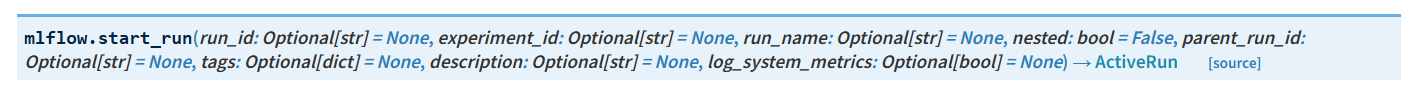

In [1]:
import mlflow 

run = mlflow.start_run()

In [2]:
print(type(run).__name__)

ActiveRun


In [5]:
run.info.to_proto()

run_id: "5a17699ce10642ef9ea5aeddf07fa807"
run_uuid: "5a17699ce10642ef9ea5aeddf07fa807"
run_name: "inquisitive-ram-678"
experiment_id: "0"
user_id: "manue"
status: RUNNING
start_time: 1737336677590
artifact_uri: "file:///c:/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/notebooks/mlruns/0/5a17699ce10642ef9ea5aeddf07fa807/artifacts"
lifecycle_stage: "active"

In [7]:
run.data.to_dictionary()

{'metrics': {},
 'params': {},
 'tags': {'mlflow.runName': 'inquisitive-ram-678',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

In [8]:
# Simulating a machine Learning run

# Machine learing code here
# ...

# logging some random parameters
mlflow.log_param("param1", 5)
mlflow.log_param("param2", 5)
mlflow.log_param("param3", 5)

# logging some random metrics
mlflow.log_metric("metric1", 15)
mlflow.log_metric("metric2", 52)
mlflow.log_metric("metric3", 35)

In [9]:
# Get the updated run object. This method will return the updated run object
run = mlflow.get_run(run_id=run.info.run_id)

In [10]:
run.data.to_dictionary()

{'metrics': {'metric1': 15.0, 'metric2': 52.0, 'metric3': 35.0},
 'params': {'param1': '5', 'param2': '5', 'param3': '5'},
 'tags': {'mlflow.runName': 'inquisitive-ram-678',
  'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py',
  'mlflow.source.type': 'LOCAL',
  'mlflow.user': 'manue'}}

In [11]:
#starting a new run without ending the previous one will throw an error
try:
    run2 = mlflow.start_run()
except Exception as e:
    print(e)

Run with UUID 5a17699ce10642ef9ea5aeddf07fa807 is already active. To start a new run, first end the current run with mlflow.end_run(). To start a nested run, call start_run with nested=True


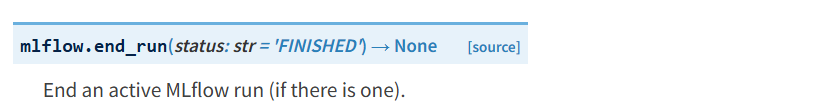

In [14]:
# To start a new run, first end the current run with mlflow.end_run().
mlflow.end_run()

active


In [13]:
#starting a new run
run2 = mlflow.start_run()
print(run2.info.lifecycle_stage)

active


In [15]:
mlflow.end_run()

# Using run object as context manager

In [19]:
with mlflow.start_run() as run: 
    print("WITHIN RUN CONTEXT")
    print("Run Status: ",run.info.status)

    # logging some random parameters
    mlflow.log_param("param1", 5)
    mlflow.log_param("param2", 5)
    mlflow.log_param("param3", 5)

    # logging some random metrics
    mlflow.log_metric("metric1", 15)
    mlflow.log_metric("metric2", 52)
    mlflow.log_metric("metric3", 35)


print("OUTSIDE RUN CONTEXT")
# Get the updated run object. This method will return the updated run object
run = mlflow.get_run(run_id=run.info.run_id)

print("Run Status: ",run.info.status)
print(run.data.to_dictionary())


WITHIN RUN CONTEXT
Run Status:  RUNNING
OUTSIDE RUN CONTEXT
Run Status:  FINISHED
{'metrics': {'metric1': 15.0, 'metric2': 52.0, 'metric3': 35.0}, 'params': {'param1': '5', 'param2': '5', 'param3': '5'}, 'tags': {'mlflow.runName': 'glamorous-midge-699', 'mlflow.source.name': 'c:\\Users\\manue\\projects\\mlflow_for_ml_dev\\.venv\\Lib\\site-packages\\ipykernel_launcher.py', 'mlflow.source.type': 'LOCAL', 'mlflow.user': 'manue'}}


# Creating run using Client

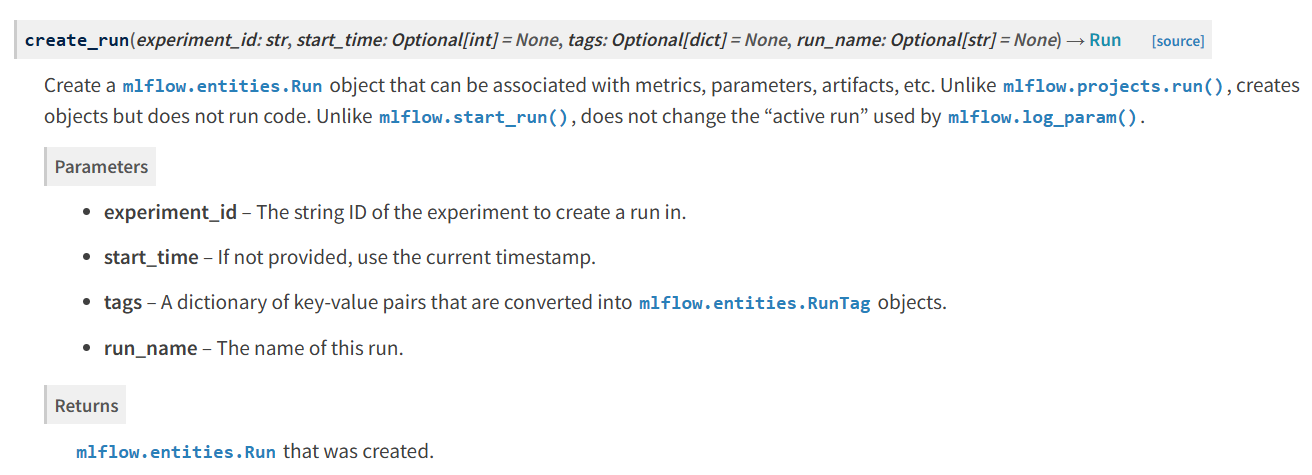

In [33]:
client = mlflow.MlflowClient()

# create a run in the default experiment
run = client.create_run(experiment_id="0") 

print(type(run).__name__)

Run


In [34]:
run.info.to_proto()

run_id: "ee59485b2fc24f06a463d409b47bb7a0"
run_uuid: "ee59485b2fc24f06a463d409b47bb7a0"
run_name: "silent-dolphin-688"
experiment_id: "0"
user_id: "unknown"
status: RUNNING
start_time: 1737337807797
artifact_uri: "file:///c:/Users/manue/projects/mlflow_for_ml_dev/mlflow_for_ml_dev/notebooks/mlruns/0/ee59485b2fc24f06a463d409b47bb7a0/artifacts"
lifecycle_stage: "active"

In [35]:
# Associating metrics and parameters with the run
mlflow.log_metric(key="m1", value=1.5, run_id=run.info.run_id)

# log_param does not accept run_id as parameter
try:
    mlflow.log_param(key="p1", value=2.5, run_id=run.info.run_id)
except Exception as e:
    print(e)

log_param() got an unexpected keyword argument 'run_id'


## Ending a  with the client

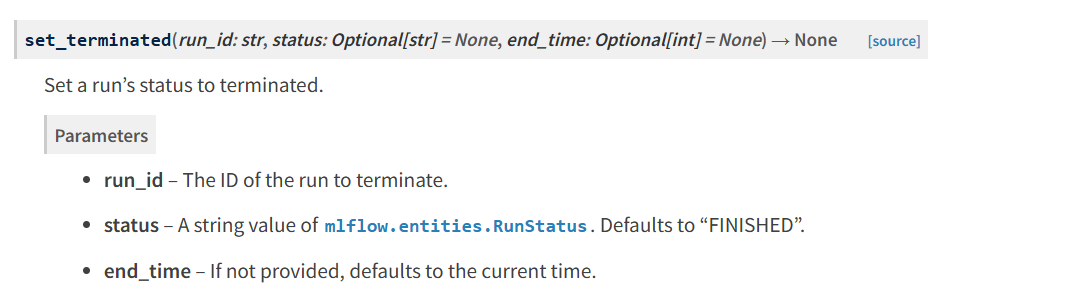

In [37]:
client = mlflow.MlflowClient()

client.set_terminated(run_id = run.info.run_id)

# retrieve the run object to verify that the run is terminated
run = mlflow.get_run(run.info.run_id)
print(run.info.status)

FINISHED


## Using run as context maanager.

In [40]:
run = client.create_run(experiment_id="0")

with mlflow.start_run(run_id=run.info.run_id) as run:
    print("WITHIN RUN CONTEXT")
    print("Run Name: ", run.info.run_name)
    print("Run Status: ",run.info.status)
    mlflow.log_param("p1", 1)
    mlflow.log_metric("m1", 2)


run = client.get_run(run.info.run_id)
print("OUTSIDE CONTEXT")
print("Run Name: ", run.info.run_name)
print("Run Status: ",run.info.status)
print("Run Data")
print(run.data.to_dictionary())



WITHIN RUN CONTEXT
Run Name:  auspicious-mouse-87
Run Status:  RUNNING
OUTSIDE CONTEXT
Run Name:  auspicious-mouse-87
Run Status:  FINISHED
Run Data
{'metrics': {'m1': 2.0}, 'params': {'p1': '1'}, 'tags': {'mlflow.runName': 'auspicious-mouse-87'}}
